In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from pydataset import data
import seaborn as sns
import env

### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [25]:
x = np.arange(50,150)

office_1 = stats.norm(90, 15).pdf(x)
office_2 = stats.norm(100, 20).pdf(x)

### We will use an independent T-Test here since we are comparing the means of two different groups.

### Problem sovling method:
1. Plot distributions.
2. Establish hypothesis.

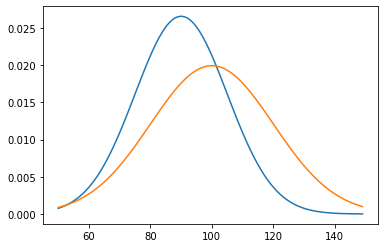

In [26]:
plt.plot(x, office_1, label= 'Office 1')
plt.plot(x, office_2, label= 'Office 2')

$H_0$ = The average time to sell homes:  $t_A$ == $t_B$

$H_a$ = The average time to sell homes:  $t_A$ !=  $t_B$

#### 3. Set significance level.

In [16]:
α = 0.05

#### 4. Verify Assumptions:

* Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)
* Independent samples
* Equal Variances (or set method argument to False when not

Based on the distributions, I'm gong to assume the variances are close enough.

#### 5. Compute test statistic and probability (t-statistic & p-value) using scipy.stats.ttest_ind

In [34]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var= False)

In [35]:
t, p

(-2.7091418459143854, 0.00811206270346016)

In [37]:
print(f'''
Because the p-value ({p}) is less than alpha value ({α}),we reject the null hypothesis.''')


Because the p-value (0.00811206270346016) is less than alpha value (0.05),we reject the null hypothesis.


# Load the mpg dataset and use it to answer the following questions:

#### * Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
#### * Are compact cars more fuel-efficient than the average car?
#### * Do manual cars get better gas mileage than automatic cars?

In [84]:
# Store mpg dataframe into a variable
mpg = data('mpg')

In [41]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### * Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [90]:
# Create a column that is the average of each car's city and highway gas mileage.
mpg['fuel_efficiency'] = (mpg.cty + mpg.hwy)/2

In [91]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [69]:
# Create an array that holds the fuel efficiency values for cars made in 1999
fuel_efficiency_1999 = mpg.fuel_efficiency[mpg.year == 1999]

# Create an array that holds the fuel efficiency values for cars made in 2008
fuel_efficiency_2008 = mpg.fuel_efficiency[mpg.year == 2008]


## Problem sovling method:
### 1. Plot distributions.
### 2. Establish hypothesis

Text(0.5, 1.0, '2008')

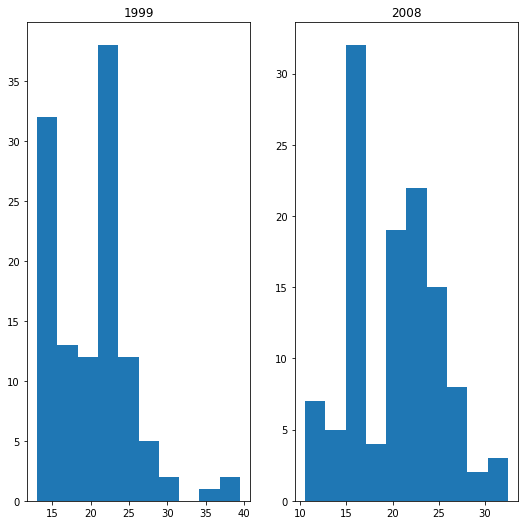

In [75]:
# Specify size of diagrams
plt.figure(figsize=(8.8,8.8))

plt.subplot(121)
plt.hist(fuel_efficiency_1999)
plt.title('1999')

plt.subplot(122)
plt.hist(fuel_efficiency_2008)
plt.title('2008')

$H_0$ = The fuel efficiency of cars made in 1999 == the fuel efficiency of cars made in 2008

$H_a$ = The fuel efficiency of cars made in 1999 != the fuel efficiency of cars made in 2008

### 3. Set significance level.

In [85]:
# Set significance level to 0.05
α = 0.05

### 4. Verify Assumptions:

* Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)
* Independent samples
* Equal Variances (or set method argument to False when not

In [66]:
print(fuel_efficiency_1999.var())
print(fuel_efficiency_2008.var())

27.122605363984682
24.097480106100797


### 5. Compute test statistic and probability (t-statistic & p-value) using scipy.stats.ttest_ind

In [67]:
t, p = stats.ttest_ind(fuel_efficiency_1999, fuel_efficiency_2008)

In [68]:
t, p

(0.21960177245940962, 0.8263744040323578)

### Takeaway

* The test statistic is close to zero(0). This may indicate the two means are in fact similar
* The p-value is much greater than our significance level. 

### We fail to reject the null hypothesis.

In [82]:
fuel_efficiency_1999.mean(), fuel_efficiency_2008.mean()

(20.22222222222222, 20.076923076923077)

### * Are compact cars more fuel-efficient than the average car?

In [97]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [98]:
# Create an array that holds the values of the average fuel efficiency of compact cars.
compact_fe = mpg[mpg['class'] == 'compact'].fuel_efficiency

# Create an array that holds the values of the average fuel efficiency of midsized cars.
midsized_fe = mpg[mpg['class'] == 'midsize'].fuel_efficiency

## Problem Solving Method

1. Plot the distributions of the two attributes that are being compared

Text(0.5, 1.0, 'Midsize')

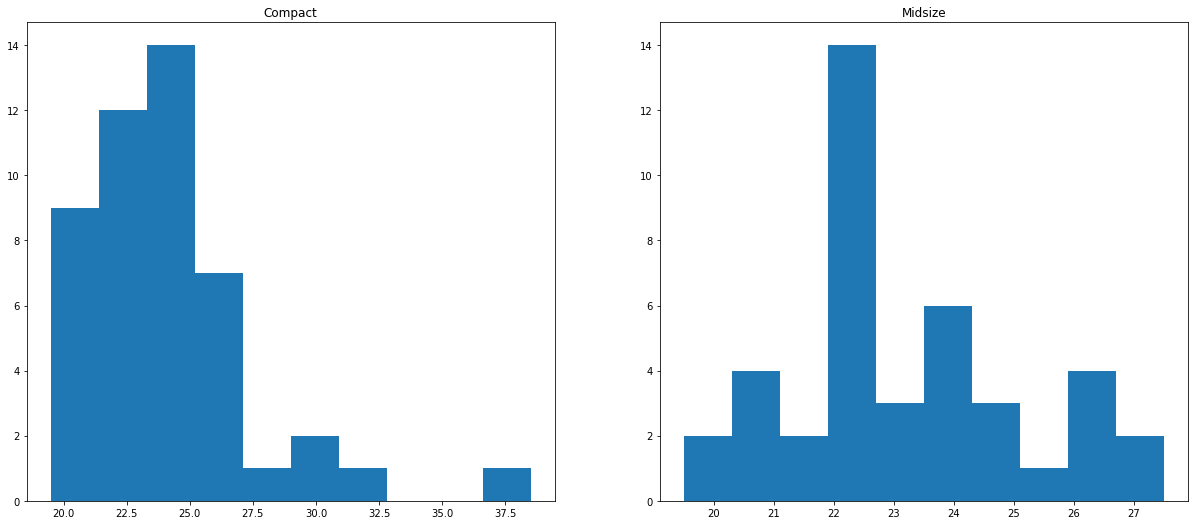

In [102]:
plt.figure(figsize = (20.8, 8.8))
plt.subplot(121)
plt.hist(compact_fe)
plt.title('Compact')

plt.subplot(122)
plt.hist(midsized_fe)
plt.title('Midsize')

### 2. Create your hypothesis.

$H_0$ = The fuel efficiency of compact cars == the fuel efficiency of average cars.

$H_a$ = The fuel efficiency of compact cars > the fuel efficiency of average cars.

### 3. Set significance level

In [106]:
α = 0.05

### 4. Verify your assumptions

* Is the data normally distributed or at least 30 observations and 'kinda' normal?  Yes
* Are the two groups independent?  Yes
* Equal Variance?  No --> set equal_var to False

In [109]:
print(compact_fe.var())
print(midsized_fe.var())

12.442876965772433
3.8118902439024374


### 5. Compute test statistic and probability (t-statistic & p-value) using scipy.stats.ttest_ind

In [111]:
t, p = stats.ttest_ind(compact_fe, midsized_fe, equal_var=False)

In [115]:
t, p/2

(1.9869420198494934, 0.025326829695052448)

## Takeaways

* The test statistic > 0. This may indicate the fuel efficiency of compact cars are greater than midsized cars.
* The p-value is greater than our significance level.

### We fail to reject our null hypothesis.

In [116]:
compact_fe.mean(), midsized_fe.mean()

(24.21276595744681, 23.024390243902438)

### * Do manual cars get better gas mileage than automatic cars?

In [117]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [119]:
# Create an array that holds values for the average fuel efficiency for automatic transmission cars.
auto_fe = mpg[mpg['trans'].str.contains('auto')].fuel_efficiency